In [ ]:
# import zipfile
# import os

# zip_path = 'svhn-yolo.zip' 

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall('svhn-yolo') 

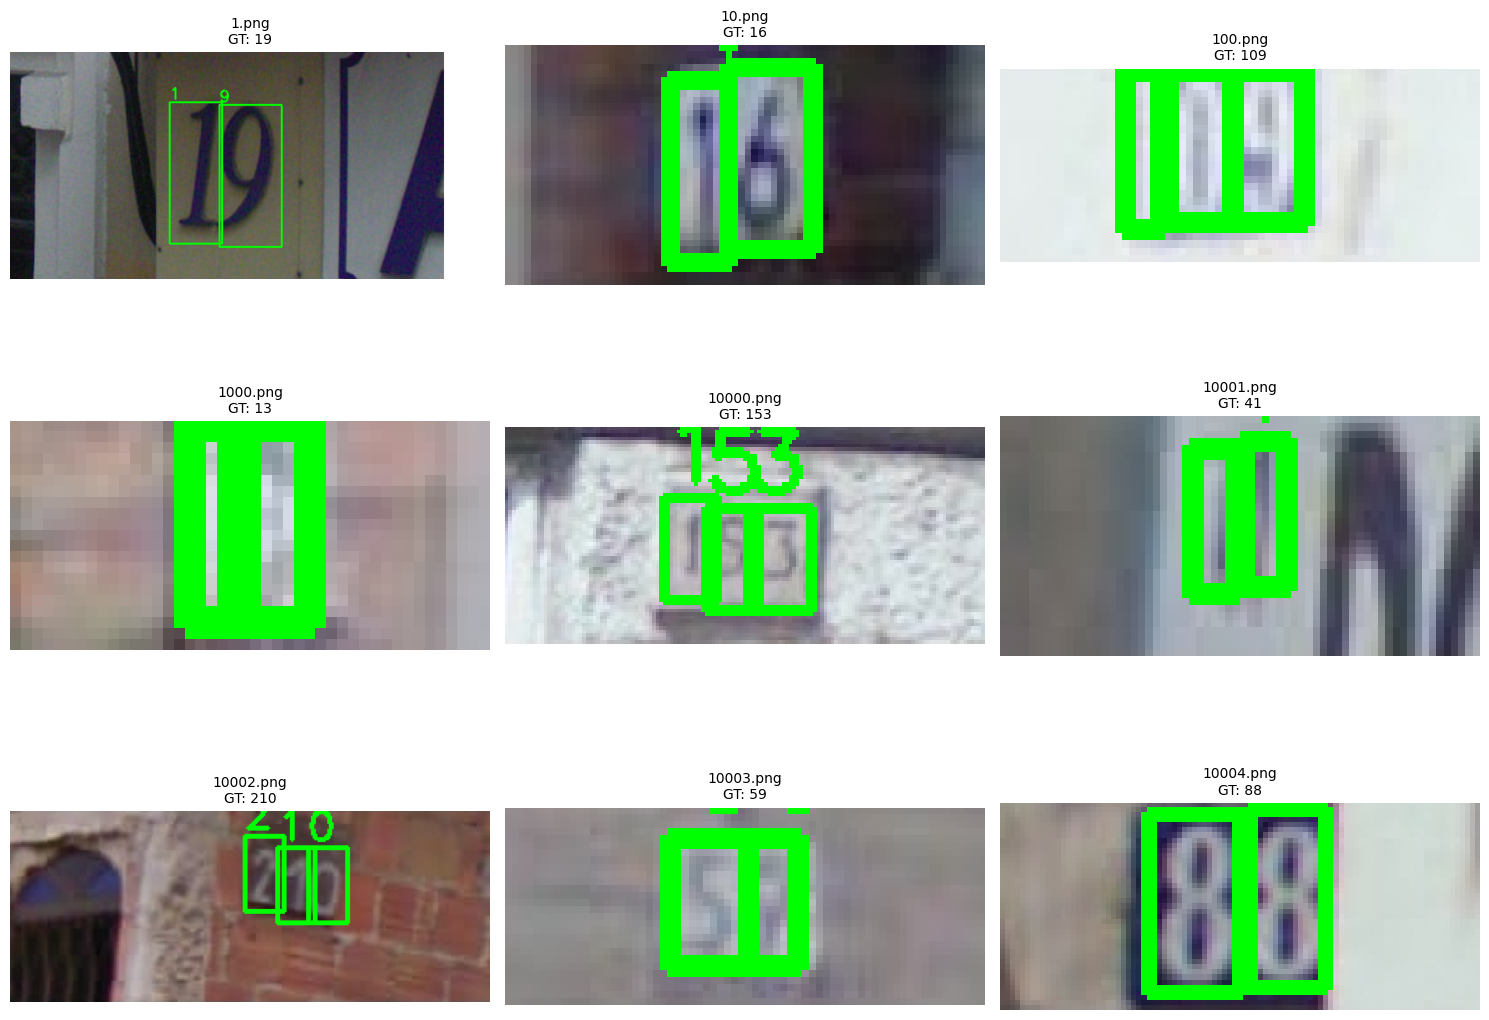

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

#paths for train dataset
train_img_dir = 'svhn-yolo/images/train'
train_label_dir = 'svhn-yolo/labels/train'

#Get some images to display
image_files = sorted([f for f in os.listdir(train_img_dir) if f.endswith(('.png', '.jpg'))])[:9]

#Dray Bounding boxes in on the images
def draw_boxes_and_get_label(image_path, label_path):
    img_bgr = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    h, w, _ = img_rgb.shape
    digits = []

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()

        entries = []
        for line in lines:
            cls, x_center, y_center, box_w, box_h = map(float, line.strip().split())
            x1 = int((x_center - box_w / 2) * w)
            y1 = int((y_center - box_h / 2) * h)
            x2 = int((x_center + box_w / 2) * w)
            y2 = int((y_center + box_h / 2) * h)
            entries.append((x1, int(cls)))
            cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img_rgb, str(int(cls)), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

        #Left to right
        entries.sort(key=lambda x: x[0])
        digits = ''.join(str(cls) for _, cls in entries)

    return img_rgb, digits

#Grid for display
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

#Labelled images
for i, file in enumerate(image_files):
    image_path = os.path.join(train_img_dir, file)
    label_path = os.path.join(train_label_dir, file.replace('.png', '.txt').replace('.jpg', '.txt'))

    img_annotated, gt_number = draw_boxes_and_get_label(image_path, label_path)
    axes[i].imshow(img_annotated)
    axes[i].set_title(f"{file}\nGT: {gt_number}", fontsize=10)
    axes[i].axis('off')

for j in range(len(image_files), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# !pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
import os

train_path = os.path.abspath("svhn-yolo/images/train")
val_path = os.path.abspath("svhn-yolo/images/test")

print("Train:", train_path)
print("Val:", val_path)

Train: d:\Spring2025\DL\Project\archive\svhn-yolo\images\train
Val: d:\Spring2025\DL\Project\archive\svhn-yolo\images\test


In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Load YOLOv8 model (Nano)
model = YOLO('yolov8n.pt')

# Train on your dataset
model.train(data='svhn.yaml', epochs=50, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 152MB/s]


Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=svhn.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

100%|██████████| 755k/755k [00:00<00:00, 68.2MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 202MB/s]


AMP: checks passed ✅


train: Scanning /content/svhn-yolo/svhn-yolo/labels/train... 28265 images, 0 backgrounds, 1 corrupt: 100%|██████████| 28265/28265 [00:15<00:00, 1874.72it/s]

train: WARNING ⚠️ /content/svhn-yolo/svhn-yolo/images/train/12668.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3077]


train: New cache created: /content/svhn-yolo/svhn-yolo/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/svhn-yolo/svhn-yolo/labels/test... 10585 images, 0 backgrounds, 1 corrupt: 100%|██████████| 10585/10585 [00:06<00:00, 1562.29it/s]

val: WARNING ⚠️ /content/svhn-yolo/svhn-yolo/images/test/3192.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0152]


val: New cache created: /content/svhn-yolo/svhn-yolo/labels/test.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.08G      1.729      2.387       1.54         34        640: 100%|██████████| 1767/1767 [07:24<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [01:02<00:00,  5.26it/s]


                   all      10584      23547      0.698      0.599      0.666       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.75G      1.673      1.514      1.514         52        640: 100%|██████████| 1767/1767 [07:15<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:59<00:00,  5.57it/s]


                   all      10584      23547      0.825      0.739      0.816      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.75G      1.676      1.329      1.551         38        640: 100%|██████████| 1767/1767 [07:14<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:59<00:00,  5.57it/s]


                   all      10584      23547       0.82      0.735      0.803       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.75G      1.675      1.205       1.58         44        640: 100%|██████████| 1767/1767 [07:12<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:59<00:00,  5.61it/s]


                   all      10584      23547      0.865      0.782      0.855       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.75G      1.657      1.099      1.567         51        640: 100%|██████████| 1767/1767 [07:11<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.63it/s]


                   all      10584      23547      0.857      0.784      0.846       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.75G      1.649      1.059      1.563         36        640: 100%|██████████| 1767/1767 [07:14<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.70it/s]


                   all      10584      23547      0.873      0.801       0.87      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.75G      1.636      1.024      1.555         30        640: 100%|██████████| 1767/1767 [07:11<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [01:00<00:00,  5.50it/s]


                   all      10584      23547      0.885      0.816      0.876      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.75G      1.631     0.9988      1.549         25        640: 100%|██████████| 1767/1767 [07:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.64it/s]


                   all      10584      23547      0.889      0.829      0.892      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.75G      1.625     0.9792      1.546         33        640: 100%|██████████| 1767/1767 [07:11<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.63it/s]


                   all      10584      23547      0.895      0.845      0.898      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.75G      1.619     0.9599       1.54         45        640: 100%|██████████| 1767/1767 [07:12<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:59<00:00,  5.58it/s]


                   all      10584      23547      0.894      0.844      0.897      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.75G      1.612     0.9453      1.537         48        640: 100%|██████████| 1767/1767 [07:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.70it/s]


                   all      10584      23547      0.893      0.853      0.899      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.75G      1.612     0.9284      1.533         36        640: 100%|██████████| 1767/1767 [07:19<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.65it/s]


                   all      10584      23547      0.901      0.858      0.906       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.75G       1.61     0.9295      1.532         35        640: 100%|██████████| 1767/1767 [07:17<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.62it/s]


                   all      10584      23547      0.901       0.86      0.906      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.75G      1.602     0.9127      1.529         44        640: 100%|██████████| 1767/1767 [07:09<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.64it/s]


                   all      10584      23547      0.907      0.869      0.914      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.75G      1.606     0.9107       1.53         51        640: 100%|██████████| 1767/1767 [07:06<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.71it/s]


                   all      10584      23547      0.902      0.868      0.911      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.75G      1.595     0.9029      1.525         47        640: 100%|██████████| 1767/1767 [07:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.66it/s]


                   all      10584      23547      0.908      0.871      0.915       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.75G      1.596     0.9023      1.523         36        640: 100%|██████████| 1767/1767 [07:05<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:57<00:00,  5.76it/s]


                   all      10584      23547      0.912      0.874      0.918       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.75G      1.589     0.8867      1.522         42        640: 100%|██████████| 1767/1767 [07:10<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:57<00:00,  5.76it/s]


                   all      10584      23547      0.914      0.882      0.921      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.75G      1.594     0.8849      1.525         39        640: 100%|██████████| 1767/1767 [07:10<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.71it/s]


                   all      10584      23547      0.913      0.879       0.92      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.75G       1.59     0.8801      1.523         33        640: 100%|██████████| 1767/1767 [07:06<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:57<00:00,  5.78it/s]


                   all      10584      23547      0.916      0.883      0.923      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.75G      1.585     0.8678      1.513         35        640: 100%|██████████| 1767/1767 [07:07<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.61it/s]


                   all      10584      23547      0.912      0.884      0.924      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.75G      1.585     0.8685      1.517         41        640: 100%|██████████| 1767/1767 [07:05<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.66it/s]


                   all      10584      23547      0.913      0.885      0.923      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.75G      1.583     0.8639      1.514         48        640: 100%|██████████| 1767/1767 [07:04<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:57<00:00,  5.71it/s]


                   all      10584      23547      0.912      0.889      0.924      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.75G      1.581     0.8647      1.516         46        640: 100%|██████████| 1767/1767 [07:06<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.71it/s]


                   all      10584      23547      0.915      0.891      0.925      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.75G      1.576     0.8564      1.513         47        640: 100%|██████████| 1767/1767 [07:04<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.63it/s]


                   all      10584      23547      0.914      0.888      0.924      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.75G      1.578     0.8451      1.512         42        640: 100%|██████████| 1767/1767 [07:06<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:57<00:00,  5.74it/s]


                   all      10584      23547      0.915      0.889      0.925      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.75G      1.575     0.8463      1.512         49        640: 100%|██████████| 1767/1767 [07:09<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:59<00:00,  5.57it/s]


                   all      10584      23547      0.916       0.89      0.926      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.75G      1.575     0.8452      1.507         46        640: 100%|██████████| 1767/1767 [07:20<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.64it/s]


                   all      10584      23547      0.917      0.891      0.927      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.75G      1.572      0.839      1.507         40        640: 100%|██████████| 1767/1767 [07:09<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.66it/s]


                   all      10584      23547      0.917      0.892      0.927      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.75G      1.568     0.8307      1.504         26        640: 100%|██████████| 1767/1767 [07:10<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.67it/s]


                   all      10584      23547      0.918      0.892      0.928      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.75G      1.566     0.8248      1.504         33        640: 100%|██████████| 1767/1767 [07:10<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.66it/s]


                   all      10584      23547      0.917      0.893      0.928      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.75G      1.565     0.8271      1.507         43        640: 100%|██████████| 1767/1767 [07:09<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.67it/s]


                   all      10584      23547      0.918      0.894      0.928      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.75G      1.563     0.8149      1.502         40        640: 100%|██████████| 1767/1767 [07:10<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.66it/s]


                   all      10584      23547      0.917      0.895      0.929      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.75G       1.56     0.8191      1.502         34        640: 100%|██████████| 1767/1767 [07:08<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:59<00:00,  5.61it/s]


                   all      10584      23547      0.917      0.894      0.929      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.75G       1.56     0.8144      1.502         38        640: 100%|██████████| 1767/1767 [07:06<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.68it/s]


                   all      10584      23547      0.919      0.894      0.929      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.75G      1.559     0.8064      1.499         54        640: 100%|██████████| 1767/1767 [07:08<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.67it/s]


                   all      10584      23547      0.919      0.895      0.929      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.75G      1.553     0.8011      1.497         48        640: 100%|██████████| 1767/1767 [07:10<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:59<00:00,  5.57it/s]


                   all      10584      23547      0.919      0.895      0.929      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.75G      1.554     0.7964      1.496         42        640: 100%|██████████| 1767/1767 [07:07<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:59<00:00,  5.59it/s]


                   all      10584      23547      0.919      0.895      0.929      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.75G      1.548     0.7974      1.494         42        640: 100%|██████████| 1767/1767 [07:06<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:59<00:00,  5.59it/s]


                   all      10584      23547      0.919      0.895      0.929      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.75G      1.548     0.7912      1.491         52        640: 100%|██████████| 1767/1767 [07:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.66it/s]


                   all      10584      23547      0.918      0.895      0.929      0.453
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.75G      1.604     0.6369      1.632         19        640: 100%|██████████| 1767/1767 [07:09<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:57<00:00,  5.73it/s]


                   all      10584      23547      0.918      0.895      0.929      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.75G      1.602     0.6281      1.627         19        640: 100%|██████████| 1767/1767 [06:53<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:59<00:00,  5.55it/s]


                   all      10584      23547      0.918      0.895      0.929      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.75G      1.599     0.6246      1.629         20        640: 100%|██████████| 1767/1767 [07:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.67it/s]


                   all      10584      23547      0.918      0.896      0.929      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.75G      1.593     0.6209      1.626         22        640: 100%|██████████| 1767/1767 [07:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.66it/s]


                   all      10584      23547      0.917      0.896      0.929      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.75G       1.59      0.615      1.621         19        640: 100%|██████████| 1767/1767 [07:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [01:00<00:00,  5.43it/s]


                   all      10584      23547      0.918      0.897      0.929      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.75G      1.586     0.6102      1.618         19        640: 100%|██████████| 1767/1767 [06:51<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:57<00:00,  5.76it/s]


                   all      10584      23547      0.918      0.897      0.929      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.75G      1.583     0.6036      1.619         19        640: 100%|██████████| 1767/1767 [06:51<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.70it/s]


                   all      10584      23547      0.918      0.897      0.929      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.75G      1.577      0.601       1.61         20        640: 100%|██████████| 1767/1767 [06:56<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:57<00:00,  5.72it/s]


                   all      10584      23547      0.918      0.897      0.929      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.75G      1.574     0.5955      1.612         19        640: 100%|██████████| 1767/1767 [06:57<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.71it/s]


                   all      10584      23547      0.918      0.898      0.929      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.75G       1.57     0.5907      1.609         19        640: 100%|██████████| 1767/1767 [06:53<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [00:58<00:00,  5.67it/s]


                   all      10584      23547      0.918      0.897      0.929      0.452

50 epochs completed in 6.765 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 331/331 [01:06<00:00,  4.98it/s]


                   all      10584      23547      0.918      0.896      0.929      0.453
                     0       1676       1733      0.908      0.926      0.938      0.472
                     1       4383       4904      0.902      0.851      0.884      0.378
                     2       3431       3746      0.932      0.914      0.947      0.468
                     3       2396       2582      0.924      0.859      0.922      0.453
                     4       2164       2290      0.927      0.912      0.927      0.439
                     5       1979       2073      0.927        0.9      0.935      0.464
                     6       1645       1700      0.928      0.896      0.942      0.476
                     7       1701       1777      0.912      0.914      0.944      0.456
                     8       1355       1403      0.924      0.888      0.929      0.458
                     9       1299       1339      0.891      0.895      0.922      0.467
Speed: 0.1ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7df2d3568f50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [4]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch
import os
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import pandas as pd

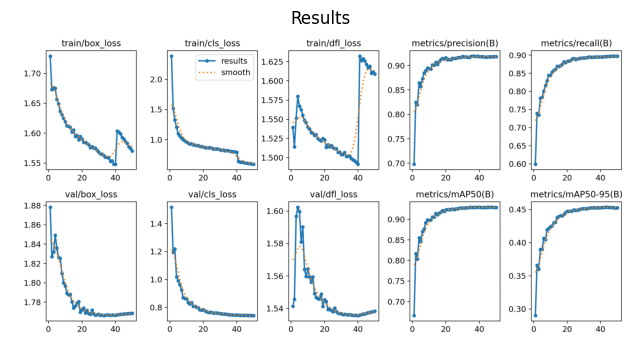

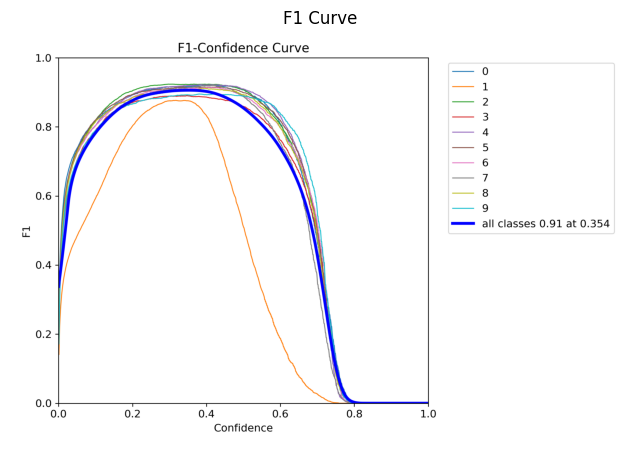

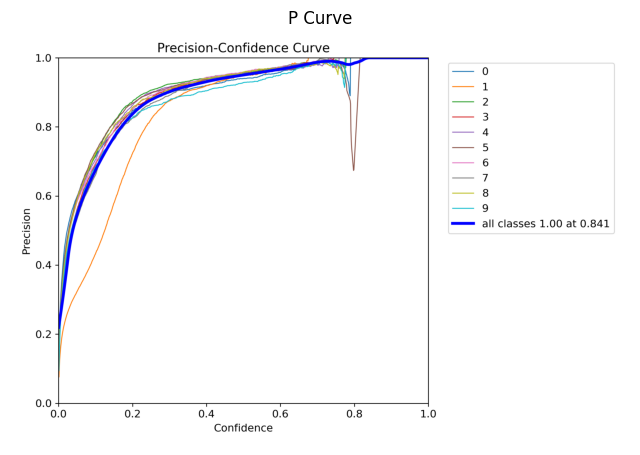

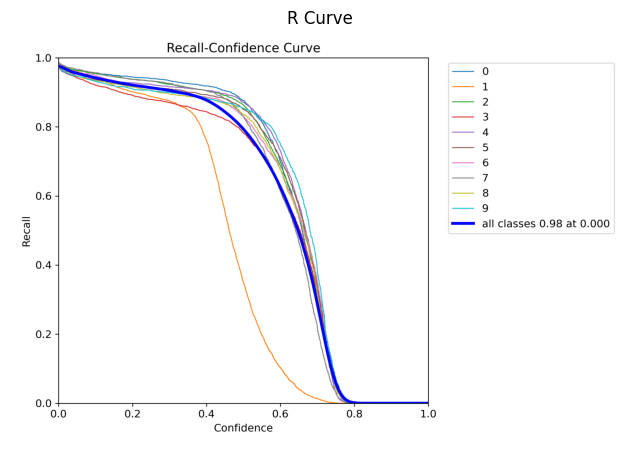

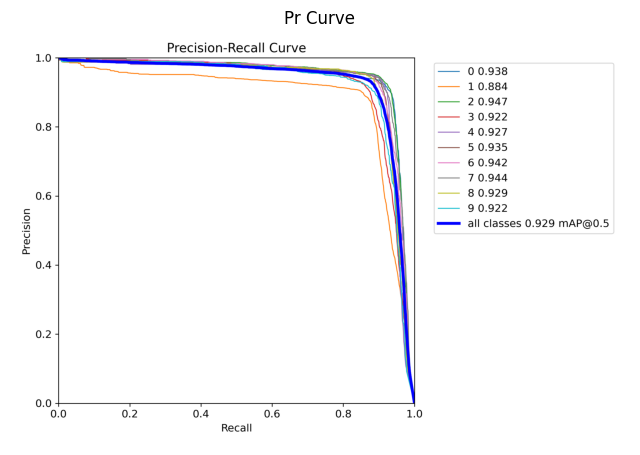

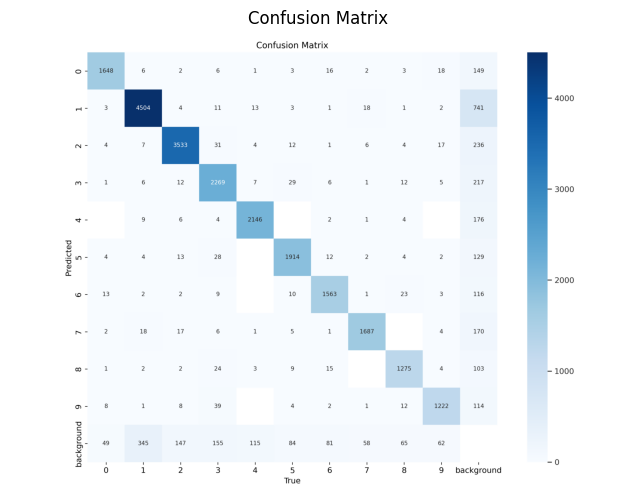

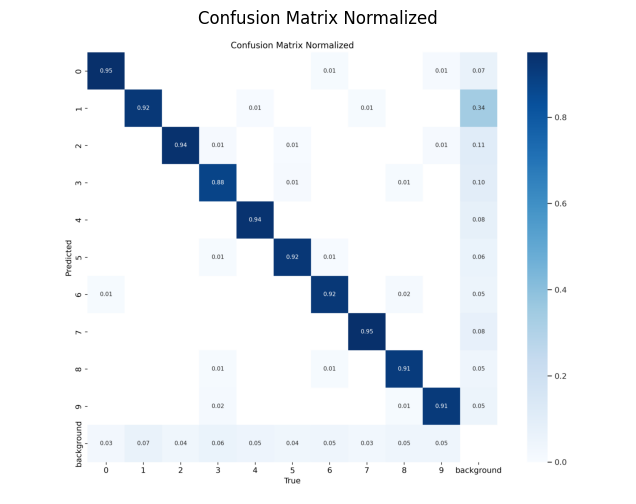

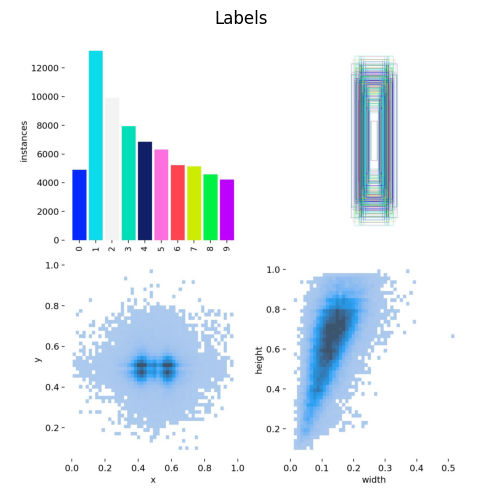

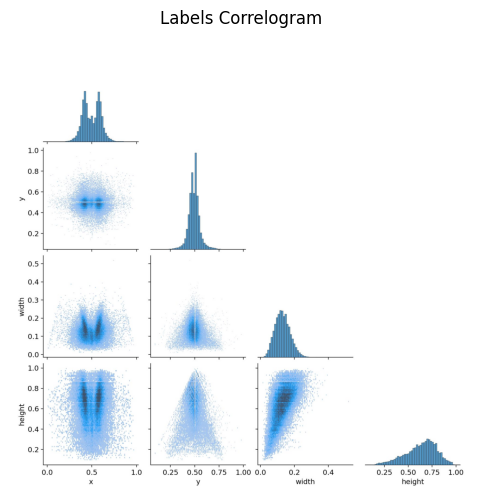

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

#Generated train directory
train_dir = 'runs/detect/train'

#Metric images generated list
metric_images = [
    "results.png",
    "F1_curve.png",
    "P_curve.png",
    "R_curve.png",
    "PR_curve.png",
    "confusion_matrix.png",
    "confusion_matrix_normalized.png",
    "labels.jpg",
    "labels_correlogram.jpg"
]

#Plotting metrics
for img_file in metric_images:
    img_path = os.path.join(train_dir, img_file)
    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.title(img_file.replace("_", " ").replace(".png", "").replace(".jpg", "").title())
        plt.axis('off')
        plt.show()
    else:
        print(f"{img_file} not found.")

C:\Users\athar\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\athar\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


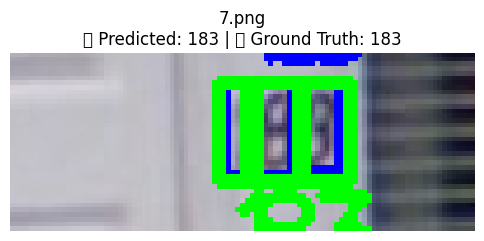

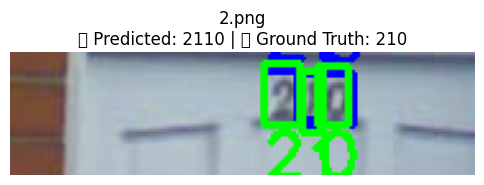

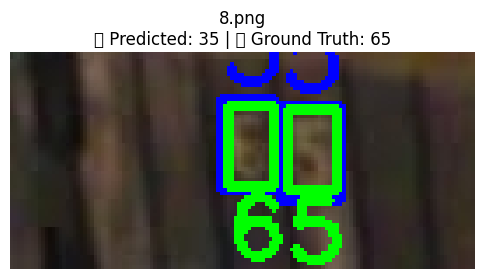

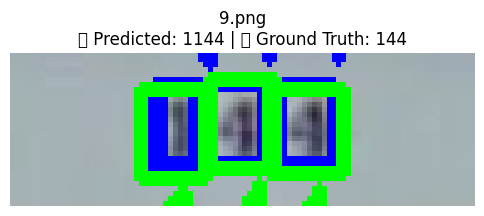

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

#Load model
best_model = YOLO('runs/detect/train/weights/best.pt').to('cpu')

#Path to some test images
image_paths = ['7.png', '2.png', '8.png', '9.png']
image_dir = 'svhn-yolo/images/test'
label_dir = 'svhn-yolo/labels/test'

#Get ground truths for images
def read_ground_truth(file_path, img_width, img_height):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    labels = []
    coords = []

    for line in lines:
        cls, x_center, y_center, w, h = map(float, line.strip().split())
        x1 = int((x_center - w / 2) * img_width)
        y1 = int((y_center - h / 2) * img_height)
        x2 = int((x_center + w / 2) * img_width)
        y2 = int((y_center + h / 2) * img_height)
        labels.append(int(cls))
        coords.append((x1, y1, x2, y2))
    
    #Left to right
    sorted_indices = sorted(range(len(coords)), key=lambda i: coords[i][0])
    sorted_labels = [labels[i] for i in sorted_indices]
    sorted_coords = [coords[i] for i in sorted_indices]
    
    return sorted_labels, sorted_coords


for image_file in image_paths:
    image_path = os.path.join(image_dir, image_file)
    label_path = os.path.join(label_dir, image_file.replace('.png', '.txt'))

    #Image
    img_bgr = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    h, w, _ = img_rgb.shape

    #preds
    result = best_model(img_rgb, verbose=False)[0]
    boxes = result.boxes

    if boxes is None or boxes.cls.shape[0] == 0:
        print(f"{image_file}: No digits detected.")
        continue

    pred_classes = boxes.cls.cpu().numpy()
    pred_coords = boxes.xyxy.cpu().numpy()
    pred_order = pred_coords[:, 0].argsort()
    pred_digits = [int(pred_classes[i]) for i in pred_order]

    #Predicted BB
    for i in pred_order:
        x1, y1, x2, y2 = pred_coords[i].astype(int)
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.putText(img_rgb, str(int(pred_classes[i])), (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    #Ground truth
    if os.path.exists(label_path):
        gt_digits, gt_boxes = read_ground_truth(label_path, w, h)

        #Greound truth bb
        for digit, (x1, y1, x2, y2) in zip(gt_digits, gt_boxes):
            cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img_rgb, str(digit), (x1, y2 + 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

        #Display images
        plt.figure(figsize=(6, 4))
        plt.imshow(img_rgb)
        plt.title(f"{image_file}\n🔵 Predicted: {''.join(map(str, pred_digits))} | Ground Truth: {''.join(map(str, gt_digits))}")
        plt.axis('off')
        plt.show()
    else:
        print(f"{image_file}: Ground truth not found.")
